In [48]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [49]:
X = np.load('X.npy')
Y = np.load('y.npy')

In [50]:
Y

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]], dtype=uint8)

In [51]:
Y = to_categorical(Y)

In [52]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [53]:
X = minmax_scale(X)

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [55]:
model = keras.Sequential()

for i in range(8):
  model.add(Dense(32,activation='relu'))

model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
118/118 [==============================] - 1s 3ms/step - loss: 1.7948 - accuracy: 0.3512
Epoch 2/100
118/118 [==============================] - 0s 2ms/step - loss: 0.8137 - accuracy: 0.7432
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.8291
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 0.4443 - accuracy: 0.8605
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8789
Epoch 6/100
118/118 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8923
Epoch 7/100
118/118 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.9008
Epoch 8/100
118/118 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.9128
Epoch 9/100
118/118 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.9184
Epoch 10/100
118/118 [==============================] - 0s 3ms/step - loss: 0.2337 - accura

In [44]:
print(model.metrics_names)

['loss', 'accuracy']


In [45]:
model.evaluate(X_test,Y_test)

40/40 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.9152


[0.547555685043335, 0.9151999950408936]

In [46]:
original_Y = np.load('y.npy')
X = X.reshape(X.shape[0],20,20)
print(X.shape)
n = 4
'''
for i in range(len(original_Y)):
  print(np.argmax(model.predict(np.array([X[3].reshape(400)]))[0]))
  plt.imshow(X[3].transpose(),cmap='gray')
  break
'''

(5000, 20, 20)


"\nfor i in range(len(original_Y)):\n  print(np.argmax(model.predict(np.array([X[3].reshape(400)]))[0]))\n  plt.imshow(X[3].transpose(),cmap='gray')\n  break\n"

9


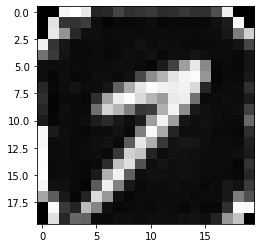

In [47]:
import random
num = random.randrange(0,5000)
print(np.argmax(model.predict(np.array([X[num].reshape(400)]))[0]))
plt.imshow(X[num].transpose(),cmap='gray')